<img src="https://bellabeat.com/wp-content/uploads/2023/09/Bellabeat-logo.jpg" alt="Bellabeat Logo" width="200"/>


* [1. Summary](#Summary)
* [2. Ask](#Ask)
* [3. Prepare](#Prepare)
* [4. Process](#Process)
* [5. Analize](#Analize)
* [6. Share](#Share)
* [7. Act](#Act)


    


<a id="Summary"></a>
# <span style="color:#20beff;"> 1. Summary </span>

Bellabeat is a high-tech company that manufactures health-focused smart products. They offer different smart devices that collect data on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits

We will focus on one of Bellabeat’s products: Bellabeat app. It provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits

The main goal is analyze smart devices fitness data, discover trendings and determine how it could help unlock new growth opportunities for Bellabeat


<a id="Ask"></a>
# <span style="color:#20beff;"> 2. Ask </span>

##Business Task

Analyze smart device usage data to gain insight into how consumers use non-Bellabeat smart devices and apply it to Bellabeat's marketing strategy.

##Stakeholders

Urška Sršen - Bellabeat cofounder and Chief Creative Officer

Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team

Bellabeat Marketing Analytics team

<a id="Prepare"></a>
# <span style="color:#20beff;"> 3. Prepare </span>

##Dataset used

The data source used is FitBit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius.


##Accessibility and privacy of data

Verifying the metadata of our dataset we can confirm it is open-source. The owner has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law.


##Information about our dataset

These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.


##Installing and loading Packages in R programming language

The whole analysis will be executed in R due to the size of the data, and the ability to create quick and beautiful visualizations for stakeholders

Available to us are 18 CSV documents. Each document represents different quantitative data tracked by Fitbit.


In [134]:
#Installing packages:

install.packages("tidyverse")
install.packages("dplyr")
install.packages("tidyr")
install.packages("lubridate")
install.packages("here")
install.packages("skimr")
install.packages("janitor")
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("corrplot")
install.packages("hms")
install.packages("reshape2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [135]:
#Loading Packages

library(tidyverse)
library(dplyr)
library(tidyr)
library(lubridate)
library(here)
library(skimr)
library(janitor)
library(ggplot2)
library(ggrepel)
library(corrplot)
library(hms)
library(reshape2)

## Importing and checking the data

In this phase, we load the activity dataset into our R environment. This step is crucial as it sets the foundation for our analysis. By importing the data, we ensure that we have access to all necessary variables, including TotalSteps, Calories, and activity metrics, enabling us to explore trends, patterns, and insights effectively. Proper data import is essential for the integrity and accuracy of our subsequent analyses and visualizations.


In [136]:
#We will use these five datasets:

activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [137]:
glimpse(activity)

#Checking Columns and data types
#Note that the ActivityDate is in wrong format "chr"

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [138]:
glimpse(calories)

#Note that the ActivityHour is in wrong format "chr"

Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


In [139]:
glimpse(intensities)
#Note that the ActivityHour is in wrong format "chr"

Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


In [140]:
glimpse(sleep)
#Note that the SleepDay is in wrong format "chr"

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


In [141]:
glimpse(weight)

#Note that Date is in wrong format "chr"

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


##Data Organization

* The data is considered long since each row is one time point per subject, so each subject will have data in multiple rows

* Every user has a unique ID and different rows since data is tracked by day and time

* We could verify this checking the small quantity of columns for each table

<a id="Process"></a>
# <span style="color:#20beff;"> 4. Process </span>

In the data processing stage, we clean and transform the imported dataset to prepare it for analysis. This includes handling missing values, creating new variables, and ensuring that data types are appropriate for our analyses. For instance, we may derive the day of the week from date variables, allowing for more insightful visualizations and comparisons. Effective data processing is critical to enhance data quality and ensure that our findings accurately reflect the underlying trends and patterns in the dataset.


##Packages used in this report are:


* tidyverse
* dplyr
* tidyr
* lubridate
* here
* skimr
* janitor
* ggplot2
* ggrepel
* corrplot
* hms
* reshape2

##Converting format from Strings to Dates and DateTime

In this phase, we focus on converting string representations of dates and times into appropriate Date and DateTime formats. This conversion is essential for performing accurate temporal analyses, as it allows us to leverage date-based functions for filtering, grouping, and aggregating data. Properly formatted dates facilitate the extraction of insights related to time, such as trends, seasonality, and comparisons across different periods. Ensuring that our date and time data is in the correct format is a foundational step for any time series analysis.



In [142]:
#activity conversion (ActivityDate, DayOfWeek)
activity <- activity %>%
  mutate(ActivityDate = as.Date(ActivityDate, format = "%m/%d/%Y"))
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")
activity$DayOfWeek <- weekdays(activity$ActivityDate)
#Check
glimpse(activity)

Rows: 940
Columns: 17
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [143]:
#calories conversion (ActivityHour)

calories <- calories %>%
  mutate(ActivityHour = parse_date_time(ActivityHour, orders = "%m/%d/%Y %I:%M:%S %p"))
#Check
glimpse(calories)


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-12 02:…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


In [144]:
#intensities conversion (ActivityHour)
intensities <- intensities %>%
  mutate(ActivityHour = parse_date_time(ActivityHour, orders = "%m/%d/%Y %I:%M:%S %p"))
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y") # New column used to merge
#Check
glimpse(intensities)

Rows: 22,099
Columns: 6
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-12…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…
$ time             <chr> "00:00:00", "01:00:00", "02:00:00", "03:00:00", "04:0…
$ date             <chr> "04/12/16", "04/12/16", "04/12/16", "04/12/16", "04/1…


In [145]:
#sleep conversion (SleepDay)
sleep <- sleep %>%
  mutate(SleepDay = as.Date(SleepDay, format = "%m/%d/%Y"))
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y") # New column used to merge
#Check
glimpse(sleep)


Rows: 413
Columns: 6
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 20…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
$ date               <chr> "04/12/16", "04/13/16", "04/15/16", "04/16/16", "04…


In [146]:
#weight conversion (Date)
weight <- weight %>%
  mutate(
    Date = as.Date(Date, format = "%m/%d/%y")
  )
#Check
glimpse(weight)

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <date> 2020-05-02, 2020-05-03, 2020-04-13, 2020-04-21, 2020-0…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


## Improving Data Cleaning

In the data cleaning phase, we can further enhance our approach by implementing more rigorous checks for missing values, duplicates, and inconsistent data types. By ensuring the integrity of our dataset, we can derive more accurate insights from the analysis. Additional techniques such as outlier detection and imputation strategies will also be considered to optimize our data quality.


In [147]:
# Applying a filter for outliers using IQR
Q1 <- quantile(activity$TotalSteps, 0.25)
Q3 <- quantile(activity$TotalSteps, 0.75)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
outliers <- activity %>% filter(TotalSteps < lower_bound | TotalSteps > upper_bound)


<a id="Analize"></a>
# <span style="color:#20beff;"> 5. Analize </span>

During the analysis process, we dive into the dataset to uncover meaningful insights and trends.

This involves various techniques such as exploratory data analysis (EDA), statistical tests, and visualizations to better understand the relationships between variables.

By examining patterns in the data, such as daily activity levels or correlations between steps and calories burned, we can identify key factors that influence user behavior.

This analysis not only aids in making data-driven decisions but also lays the groundwork for future predictive modeling and optimization efforts.


We will count unique values for the column Id in each table

In [148]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

Through this way we could observe that the tables that tracks activity, calories and intensities; have 33 unique participants each one

The sleep tracking table have 24 participants and the weight table only 8

Now, lets summarize each data set and see some insights:

In [149]:
# activity
cat("Activity Table\n\n") # using "cat" for adding spaces between outputs
activity %>%
  select(TotalSteps, TotalDistance, SedentaryMinutes, Calories) %>%
  summary()

cat("\n")

# explore num of active minutes per category
cat("Activity Table - Number of active minutes per category\n\n")
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

cat("\n")

# calories
cat("Calories Table\n\n")
calories %>%
  select(Calories) %>%
  summary()

cat("\n")

# sleep
cat("Sleep Table\n\n")
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

cat("\n")

# weight
cat("Weight Table\n\n")
weight %>%
  select(WeightKg, BMI) %>%
  summary()


Activity Table



   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  


Activity Table - Number of active minutes per category



 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       


Calories Table



    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  


Sleep Table



 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  


Weight Table



    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

In [150]:
# Order the days of the week
steps_by_day$DayOfWeek <- factor(steps_by_day$DayOfWeek,
                                   levels = c("Sunday", "Monday", "Tuesday",
                                              "Wednesday", "Thursday", "Friday", "Saturday"))

In [151]:
# Summarize total steps by day of the week
steps_by_day <- activity %>%
   group_by(DayOfWeek) %>%
   summarise(TotalSteps = sum(TotalSteps, na.rm = TRUE))
 # Display the summarized total steps by day of the week

# Order the days of the week based on TotalSteps
steps_by_day <- steps_by_day %>%
   arrange(desc(TotalSteps))

print(steps_by_day)



# A tibble: 7 × 2
  DayOfWeek TotalSteps
  <chr>          <int>
1 Tuesday      1235001
2 Wednesday    1133906
3 Thursday     1088658
4 Saturday     1010969
5 Friday        938477
6 Monday        933704
7 Sunday        838921


##Key Insights

- Activity Levels: Average daily steps (7,638) and distance (5.49 km) show variability. Sedentary time is high (991.2 minutes), indicating a need for more active behaviors.

- Active Minutes: Users average 21.16 minutes of vigorous activity, 13.56 minutes of moderate, and 192.8 minutes of light activity, suggesting limited vigorous exercise.

- Calories: Average calorie intake is 97.39, with a median of 83, indicating low consumption in many users.

- Sleep: Users average 419.5 minutes (about 7 hours) asleep, with total time in bed averaging 458.6 minutes, hinting at possible sleep disturbances.

- Weight: Average weight is 72.04 kg, with a BMI of 25.19, suggesting a potential overweight status among users and a need for health interventions.

- The data provides an overview of weekly physical activity, showcasing peaks and valleys in total steps.

- This information can be leveraged to develop targeted initiatives aimed at encouraging higher activity levels on lower engagement days.

## Merging Datasets

In this section, we combine the activity and sleep datasets to create a unified view of the user's health and lifestyle metrics.

This merging process enhances our ability to analyze how daily activities correlate with sleep patterns, providing a comprehensive dataset for further exploration.

By integrating these datasets, we can uncover insights that may inform recommendations for improving overall health and well-being. This will serve as a foundation for our visualizations and analyses in subsequent steps.


In [152]:
merged_data <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,⋯,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
,<dbl>,<chr>,<date>,<int>,<int>,<int>,<date>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,⋯,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,⋯,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,⋯,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,⋯,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,⋯,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,⋯,3.53,1.32,5.03,0,50,31,264,775,2035,Tuesday


In [153]:
merged_sleep <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_sleep)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,⋯,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
,<dbl>,<chr>,<date>,<int>,<int>,<int>,<date>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,⋯,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,⋯,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,⋯,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,⋯,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,⋯,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,⋯,3.53,1.32,5.03,0,50,31,264,775,2035,Tuesday


<a id="Share"></a>
# <span style="color:#20beff;"> 6. Share </span>

## Distribution of Total Steps

In this section, we will visualize the distribution of the total steps taken by participants using a density plot. This visualization will help us understand the variation in step counts and identify any potential outliers or patterns in the data.


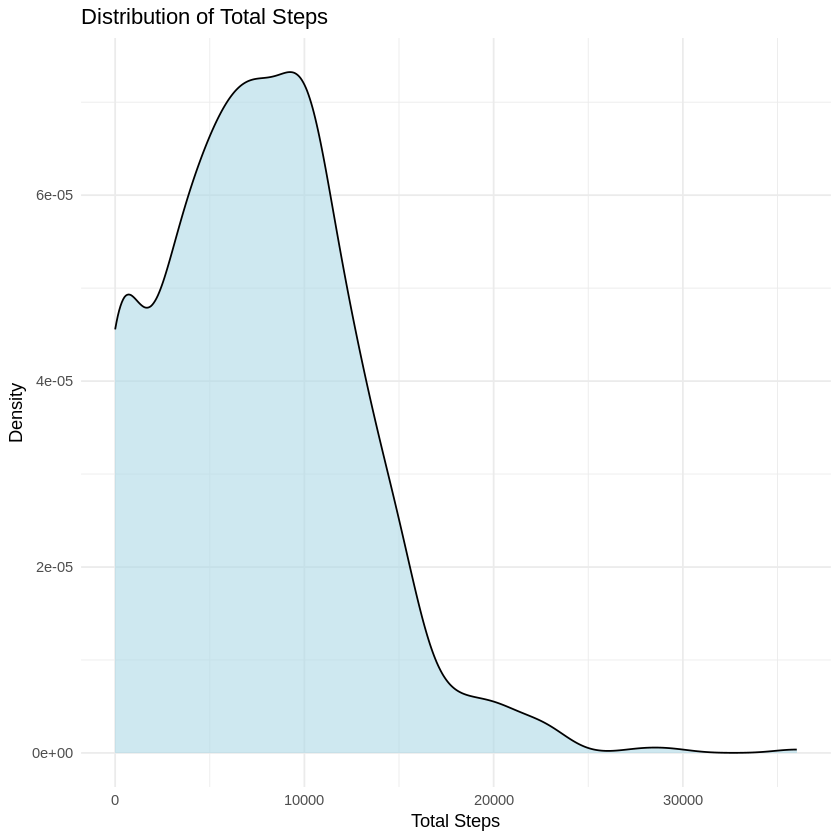

In [154]:
# Distribution of Total Steps
ggplot(activity, aes(x = TotalSteps)) +
  geom_density(fill = "lightblue", color = "black", alpha = 0.6) +
  labs(title = "Distribution of Total Steps", x = "Total Steps", y = "Density") +
  theme_minimal()


## Correlation Matrix Heatmap

The correlation heatmap illustrates the relationships between key variables in our dataset, including Total Steps, Calories, Sedentary Minutes, Very Active Minutes, and Lightly Active Minutes. Each cell in the heatmap represents the correlation coefficient between two variables, with colors indicating the strength and direction of the correlation. A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. This visualization helps us quickly identify which variables are positively or negatively related, guiding our analysis of how different activity metrics may influence one another.


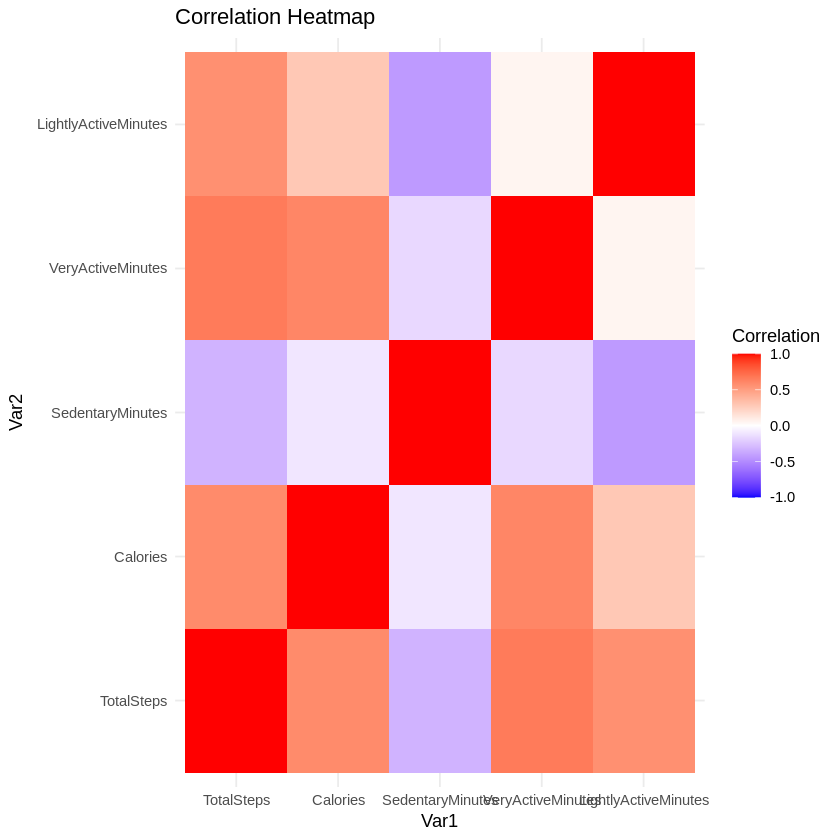

In [155]:
correlation_matrix <- cor(activity %>% select(TotalSteps, Calories, SedentaryMinutes, VeryActiveMinutes, LightlyActiveMinutes))
ggplot(melt(correlation_matrix), aes(x=Var1, y=Var2, fill=value)) +
   geom_tile() +
   scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                        midpoint = 0, limit = c(-1,1), space = "Lab",
                        name="Correlation") +
   theme_minimal() + labs(title="Correlation Heatmap")

## Violin Plot of Total Steps by Day of the Week

This violin plot visualizes the distribution of total steps taken by users across different days of the week. Instead of plotting individual dates, we categorize the data by day, which reduces clutter and allows for easier comparison of activity patterns. The width of the violin indicates the density of the data points, showing where most of the values are concentrated. Additionally, the boxplot within each violin provides a summary of the median and interquartile range, highlighting the central tendency and variability of total steps for each day.


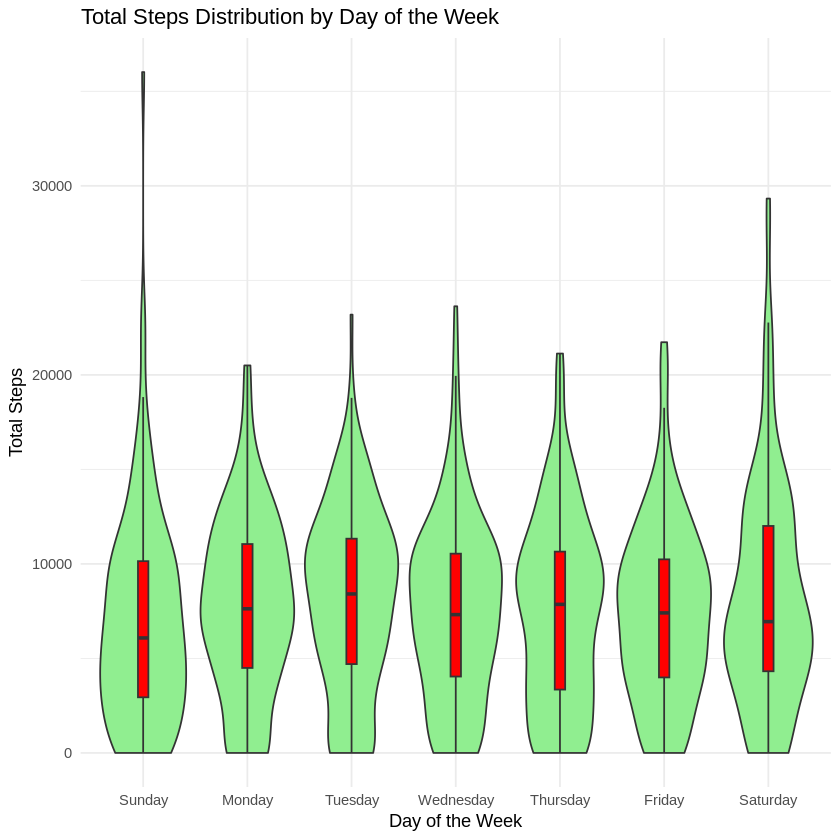

In [156]:
ggplot(data = activity, aes(x=factor(DayOfWeek, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")), y=TotalSteps)) +
   geom_violin(fill="lightgreen") +
   geom_boxplot(width=0.1, fill="red", outlier.shape=NA) +
   labs(title="Total Steps Distribution by Day of the Week", x="Day of the Week", y="Total Steps") +
   theme_minimal()


## Total Steps by Day of the Week

This bar chart illustrates the total number of steps taken throughout the week. Each bar represents a day of the week, providing a clear comparison of physical activity levels. By visualizing total steps in this manner, we can easily identify trends and variations in activity, which can inform our understanding of weekly routines and behaviors.


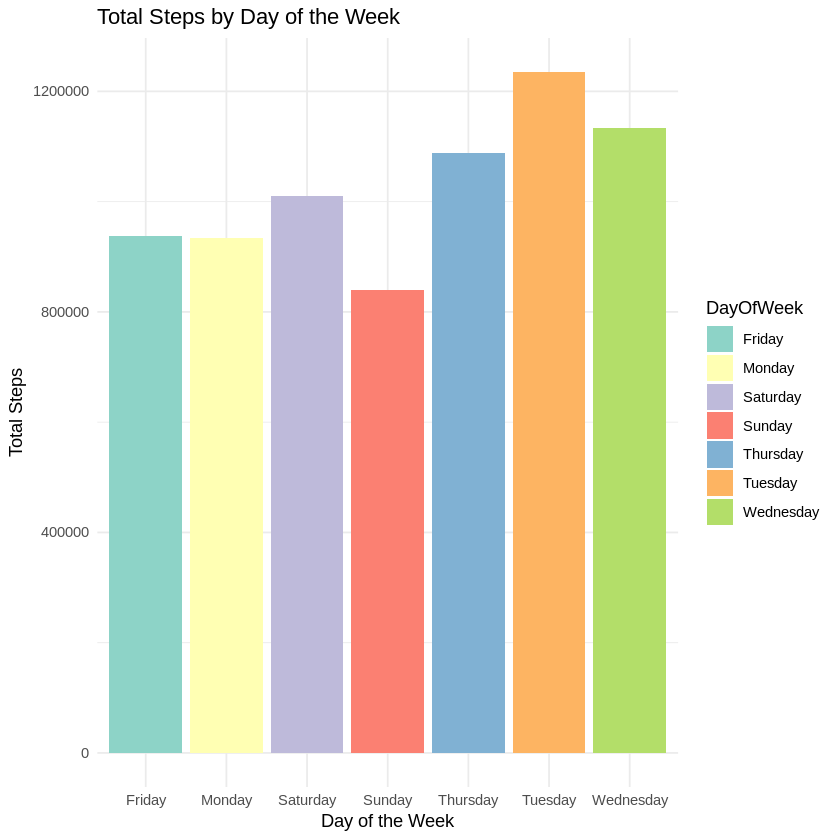

In [157]:
# Create the bar chart
ggplot(data = steps_by_day, aes(x = DayOfWeek, y = TotalSteps, fill = DayOfWeek)) +
   geom_bar(stat = "identity") +
   labs(title="Total Steps by Day of the Week", x="Day of the Week", y="Total Steps") +
   theme_minimal() +
   scale_fill_brewer(palette = "Set3")  # Optional: Change fill colors

## Analyzing the Relationship Between Steps and Calories

In this analysis, we clean the dataset by filtering out any entries where the Total Steps exceed 30,000, as these outliers can skew our results. The subsequent scatter plot visualizes the relationship between Total Steps and Calories burned, highlighting the general trend that increased physical activity correlates with higher calorie expenditure. A linear regression line (in purple) is included to illustrate this relationship further.

Overall, the plot confirms a strong positive correlation between the number of steps taken and calories burned, emphasizing the importance of physical activity in managing energy balance and promoting a healthier lifestyle.


`geom_smooth()` using formula = 'y ~ x'


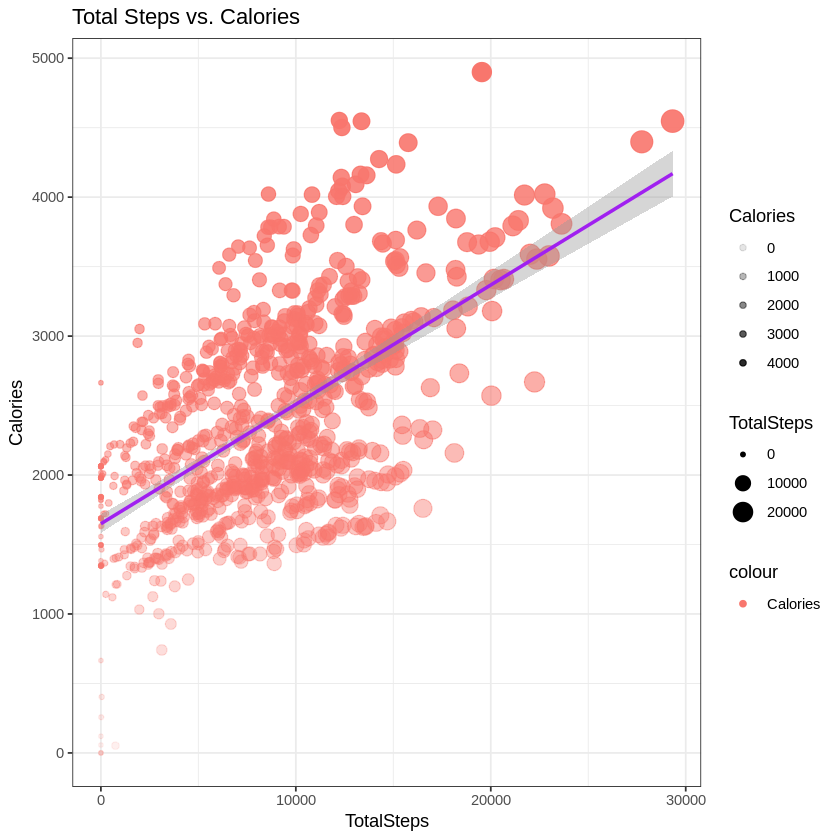

In [158]:
activity_cleaned <- activity %>% filter(TotalSteps <= 30000)

ggplot(data = activity_cleaned) +
  geom_point(mapping = aes(x=TotalSteps, y=Calories, alpha = Calories, color = "Calories", size = TotalSteps)) + geom_smooth(mapping = aes(x=TotalSteps, y=Calories),method =lm, color = "purple") + labs(title="Total Steps vs. Calories") + theme_bw()

## Examining Average Total Intensity Over Time

This analysis focuses on the average total intensity of physical activity across different time intervals throughout the day. By grouping the data by time and calculating the mean Total Intensity, we can identify patterns in physical activity levels at various hours.

The histogram reveals notable peaks in intensity, particularly between 5:00 PM and 7:00 PM, indicating that these evening hours are prime times for physical activity. This insight can inform strategies for promoting exercise and engagement during these periods, potentially enhancing overall health and wellness.


Warning message in geom_histogram(stat = "identity", fill = "light blue", color = "red"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


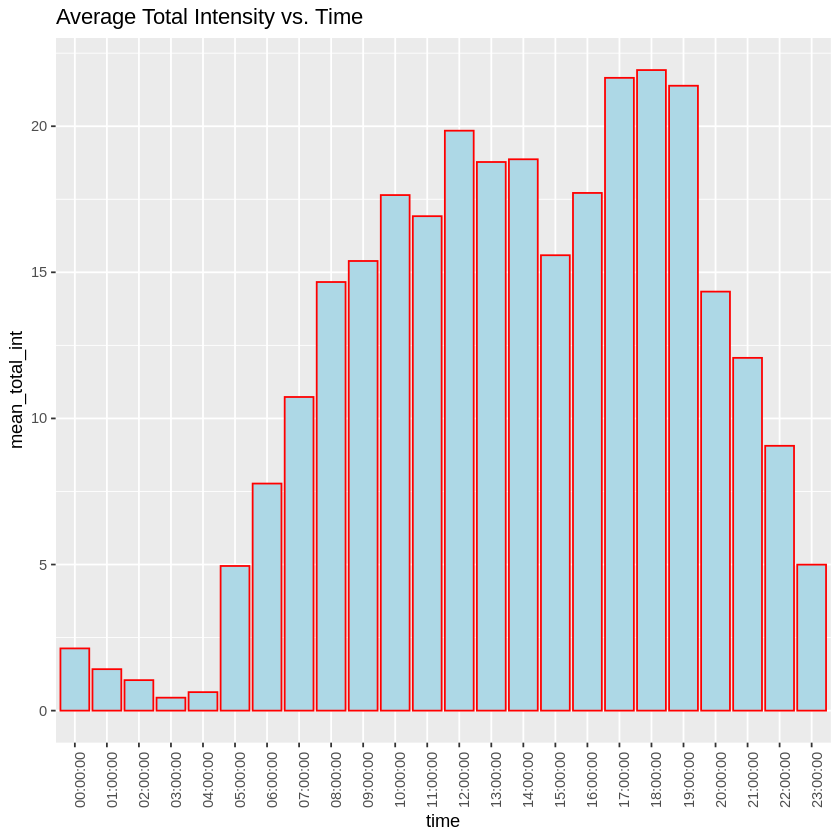

In [159]:
int_new <- intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='light blue', color = 'red') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

## Analyzing the Relationship Between Calories Burned and Total Time in Bed

This scatter plot illustrates the relationship between the number of calories burned and the total time spent in bed. By examining this correlation, we can gain insights into how sleep duration may impact energy expenditure.

The trend line indicates a negative correlation, suggesting that individuals who spend less time in bed tend to burn more calories. This observation may reflect an active lifestyle or less time allocated for rest. Further exploration could shed light on the balance between physical activity and adequate sleep for optimal health and well-being.


`geom_smooth()` using formula = 'y ~ x'


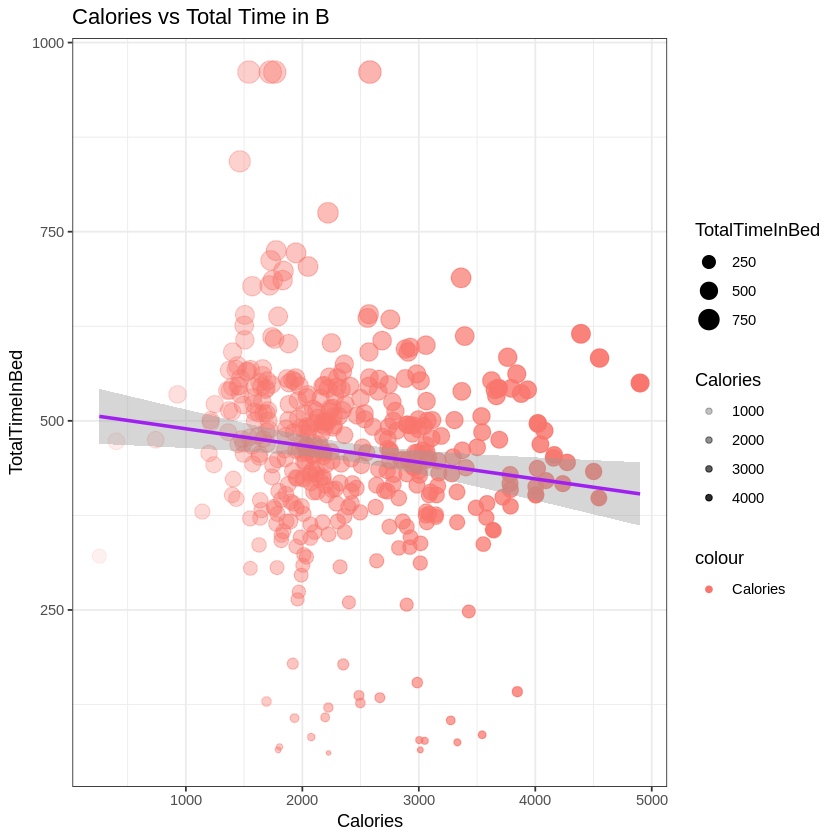

In [160]:
ggplot(data = merged_sleep) +
  geom_point(mapping = aes(x=Calories, y=TotalTimeInBed, alpha = Calories, color = "Calories", size = TotalTimeInBed)) + geom_smooth(mapping = aes(x=Calories, y=TotalTimeInBed), method = lm, color= "purple")+ labs(title= "Calories vs Total Time in B") + theme_bw()

<a id="Act"></a>
# <span style="color:#20beff;"> 7. Act </span>

After analyzing the Bella Beat data and completing various visualizations, several valuable improvement opportunities and recommended actions have been identified:

1. **Enhance Mobile App Usability:** Focus on improving the user interface to increase retention and engagement. This could involve simplifying navigation and adding compelling features that encourage regular use.

2. **Revamp Marketing Strategy:** Develop targeted advertising campaigns to raise brand awareness and drive product adoption. Collaborating with influencers and boosting social media presence could further enhance visibility.

3. **Establish a Monetization Strategy:** Implement a premium subscription model with exclusive features to ensure long-term business sustainability. Additionally, exploring partnerships with wellness service providers could diversify revenue streams.

By acting on these recommendations, Bella Beat can solidify its market position and deliver greater value to its users while ensuring continued growth in the wellness and wearable technology industry.
